In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import matplotlib.transforms as mtransforms

/var/folders/m_/w2wt9y5n2bg0k03_n88pwc9r0000gn/T/ipykernel_10814/1354583730.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=endo_final,x="k*theta",y="Oscillation_Time",hue="cat",ci=None,ax=axs['A)'])


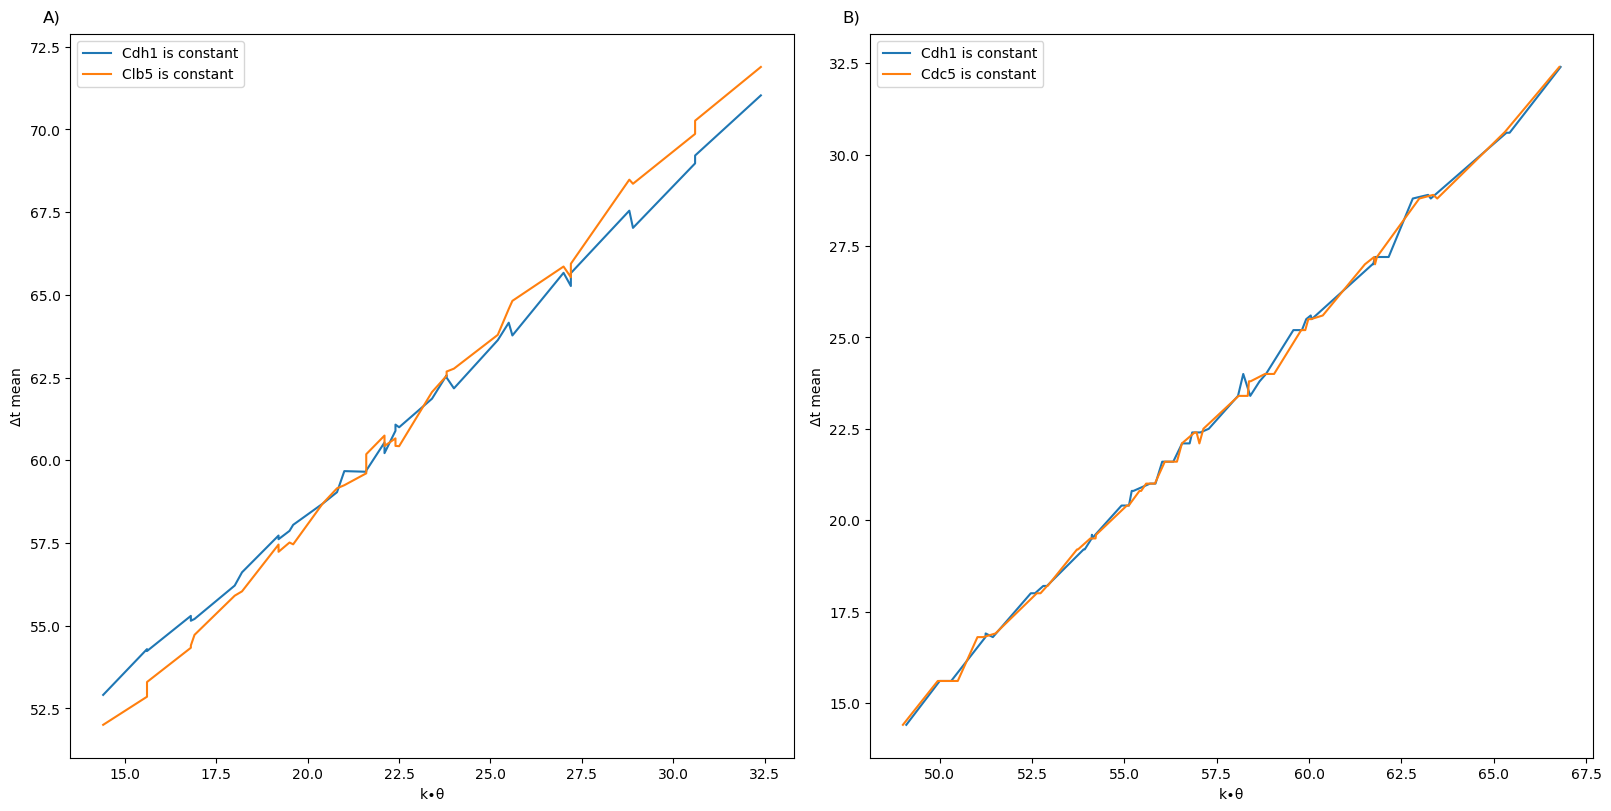

In [4]:
fig = plt.figure(layout= 'constrained', figsize=(16,8))
axs = fig.subplot_mosaic([['A)','B)']])

#endoreplication
df_endo_01 = pd.read_csv("endo_cdh1_con.csv")
df_endo_01["k*theta"] = df_endo_01["K"]*df_endo_01["THETA"]
df_endo_01["cat"] = "Cdh1 is constant"

df_endo_02 = pd.read_csv("endo_clb5_con.csv")
df_endo_02["k*theta"] = df_endo_02["K"]*df_endo_02["THETA"]
df_endo_02["cat"] = "Clb5 is constant"

endo_01 = df_endo_01.rename({"Mean_Time":"Oscillation_Time"},axis=1)
endo_02 = df_endo_02.rename({"Mean_Time":"Oscillation_Time"},axis=1)
endo_final = pd.concat([endo_01,endo_02]).reset_index()

sns.lineplot(data=endo_final,x="k*theta",y="Oscillation_Time",hue="cat",ci=None,ax=axs['A)'])
axs['A)'].legend(loc="upper left")
axs['A)'].set_xlabel("k∙θ")
axs['A)'].set_ylabel("Δt mean")


#cdc14 endoycle
df_cdc14_endo_01 = pd.read_csv("cdc14_endo_cdh1_con.csv")
df_cdc14_endo_01["k*theta"] = df_cdc14_endo_01["K"]*df_cdc14_endo_01["THETA"]
df_cdc14_endo_01["cat"] = "Cdh1 is constant"

df_cdc14_endo_02 = pd.read_csv("cdc14_endo_cdc5_con.csv")
df_cdc14_endo_02["k*theta"] = df_cdc14_endo_02["K"]*df_cdc14_endo_02["THETA"]
df_cdc14_endo_02["cat"] = "Cdc5 is constant"

cdc14_endo_01 = df_cdc14_endo_01.rename({"Mean_Time":"Oscillation_Time"},axis=1)
cdc14_endo_02 = df_cdc14_endo_02.rename({"Mean_Time":"Oscillation_Time"},axis=1)
cdc14_endo_final = pd.concat([cdc14_endo_01,cdc14_endo_02]).reset_index()

sns.lineplot(data=cdc14_endo_final,x="Oscillation_Time", y="k*theta",hue="cat",ax=axs['B)'])
axs['B)'].legend(loc="upper left")
axs['B)'].set_xlabel("k∙θ")
axs['B)'].set_ylabel("Δt mean")


for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,fontsize='large', va='bottom')
    
plt.savefig('../../figures/SFig3.pdf',format="pdf", bbox_inches="tight")
